# Анализ оттока клиентов банка «Метанпром»

## Материалы:

- Презентация: https://disk.yandex.ru/i/GQWmOAB843sj6g

- Дашборд: https://public.tableau.com/app/profile/pochemuchto/viz/project_bank_16823791133080/Dashboard1

На основе данных о клиентах банка «Метанпром» выделить сегменты клиентов, которые склонны уходить из банка. Необходимо провести анализ оттока и дать рекомендации которые помогут вернуть клиентов в банк или удержать сомневающихся. 

**Заказчик исследования -** менеджер из отдела маркетинга банка «Метанпром».

**Цель исследования -**  уменьшить отток клиентов банка.

**Задачи исследования:**

- Провести исследовательский анализ данных,
- Выделить портреты клиентов, склонных уходить из банка,
- Сформулировать и проверить статистические гипотезы,   
- Формулирование выводов и рекомендаций.

**Ход исследования:**

1. Обзор данных
    - Загрузка данных;
    - Изучение общей информации.
2. Предобработка данных
    - Проверка соответствия типов данных;
    - Исследование природы пропусков;
    - Проверка на наличие дубликатов;

3. Исследовательский анализ данных
    - Рассмотрим общую статистику;
    - Изучение количественных и категориальных признаков с распределением по столбцу `churn`;
    - Корреляционный анализ; 
    - Составление портретов оставшихся клиентов и расторгнувших договор.

4. Построить модель прогнозирования оттока клиентов
    - Разделить данные на обучающую и тестовую выборки;
    - Обучение моделей.

5. Проверка гипотез
    - Проверить гипотезу о равенстве дохода клиентов и тех, кто попал в отток;
    - Сформулируем и проверим вторую статистическую гипотезу относительно представленных данных.

6. Сегментация пользователей
    - Разделение данных на сегменты;
    - Составление портрета клиентов в каждом из сегментов;
    - Изучение соотношения попавших в отток и оставшихся клиентов в каждом сегменте.
7. Общий вывод 
    - Рекомендации.

## Обзор данных

In [1]:
# Импортирetv библиотеки
import pandas as pd 
import numpy as np
from scipy import stats as st
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Откроем файл с данными
try:
    df = pd.read_csv('bank_dataset.csv')
except:
    df = pd.read_csv('/datasets/bank_dataset.csv')

In [3]:
# Посмотрим на 5 первых строк
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Посмотрим на 5 последних строк
df.tail()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1
9999,15671055,792,Ярославль,Ж,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# Посмотрим на 5 рандомных строк
df.sample(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
5275,15622352,683,Ярославль,Ж,42,8,NaN,2,0,1,198134.90,0
3448,15653639,560,Рыбинск,Ж,31,5,125341.69,1,1,0,79547.39,0
6382,15617796,797,Ярославль,М,24,5,NaN,2,1,0,182257.61,0
244,15619005,523,Рыбинск,М,34,7,NaN,2,1,0,62030.06,0
5796,15716990,554,Рыбинск,Ж,45,4,NaN,2,1,1,193412.05,0


In [6]:
# Посмотрим общую информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


В таблице 12 столбцов и 10 тыс. строк. Столбцы содержат следующую информацию:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects`  — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

___

## Предобработка данных

Перед проведением исследовательского анализа, необходимо сделать следующее:

1. Приведём названия столбцов к единому стилю

In [7]:
# Переведем столбцы к нижнему регистру 
df.columns = df.columns.str.lower()

In [8]:
# Подкорректируем название колонок
df = df.rename(columns={'userid':'id', 'estimated_salary':'est_salary','creditcard':'credit_card'})
df.columns

Index(['id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'est_salary', 'churn'],
      dtype='object')

2. Преобразуем категориальные значения в столбцах `gender` и `city` в числовые

In [9]:
# Закодируем значения в столбце city
df_new = pd.get_dummies(df, columns=['city', 'gender'])

df_new.head(5)

,id,score,age,objects,balance,products,credit_card,loyalty,est_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0


In [10]:
# Исправим некорректное название
df_new = df_new.rename(columns={'city_Ростов Великий':'city_Ростов_Великий'})

3. Изучим пропуски

In [11]:
# Рассмотрим на процент пропущенных значений по столбцам.
pd.DataFrame(round(df.isna().mean()*100, 2)).style.background_gradient('coolwarm')

,0
id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.000000
objects,0.000000
balance,36.170000
products,0.000000
credit_card,0.000000
loyalty,0.000000


Пропуски есть только в таблице balance, выясним, к какому типу они относятся. Изучим, как строки с пропусками зависят от имеющихся данных.

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

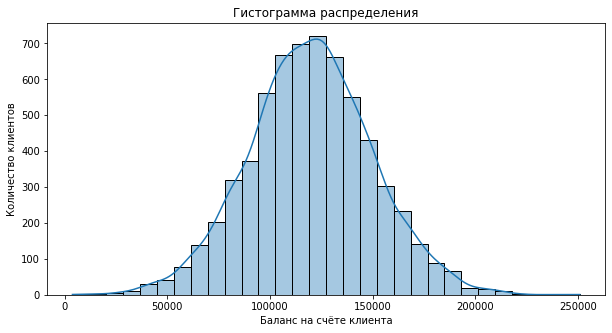

In [12]:
display(df_new['balance'].describe())
plt.figure(figsize=(10,5))
sns.histplot(data=df_new['balance'], bins=30, kde = True, alpha=0.4, palette='Set3')
sns.set_style('darkgrid')
plt.title('Гистограмма распределения')
plt.xlabel('Баланс на счёте клиента')
plt.ylabel('Количество клиентов')
plt.show()

На гистограмме выше отсутствуют выбросы, данные распределены равномерно.

При просмотре статистики по столбцу `balance` не обнаружили клиентов, чей счет равен 0. На данном этапе не известно чем можно заполнить пропуски, продолжим поиск закономерностей в данных для этого изучим возможные взаимосвязи с другими столбцами. 

Для начала проверим корректно ли занесены в значения в столбцах `city` и `gender`

In [13]:
# Проверить уникальные значения в столбце 
df['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

In [14]:
# Функция для просмотра взаимосвязей
for i in ['city', 'gender', 'products', 'credit_card', 'loyalty', 'churn']:
    print(df.groupby(i)['balance'].apply(lambda x: x.isna().sum()))
    print('---------------------------')

city
Ростов Великий       0
Рыбинск           1199
Ярославль         2418
Name: balance, dtype: int64
---------------------------
gender
Ж    1654
М    1963
Name: balance, dtype: int64
---------------------------
products
1     905
2    2600
3      98
4      14
Name: balance, dtype: int64
---------------------------
credit_card
0    1025
1    2592
Name: balance, dtype: int64
---------------------------
loyalty
0    1744
1    1873
Name: balance, dtype: int64
---------------------------
churn
0    3117
1     500
Name: balance, dtype: int64
---------------------------


Выявленные взаимосвязи со столбцами: 

- `city` - у клиентов из Ростова Великого нет пропусков в данных;
- `gender` - не выявлены. Количество пропусков почти не отличаются;
- `products` - у клиентов с двумя продуктами банка больше всего пропусков в данных;
- `credit_card` - больше всего пропусков у клиентов с кредитной картой;
- `loyalty` - закономерности у активных/неактивных клиентов не выявлено. Количество пропусков почти не отличаются;
- `churn` - значительно больше пропусков у тех, кто остался клиентом банка.

Поскольку пропуски у клиентов из Ростова отсутствуют, рассмотрим данные исключив этот город. Посмотрим, будет ли какая-то закономерность в этом случае.

In [15]:
(df.query('city!="Ростов Великий"')[df['balance'].isna()==True]).count()

id             3617
score          3617
city           3617
gender         3617
age            3617
objects        3617
balance           0
products       3617
credit_card    3617
loyalty        3617
est_salary     3617
churn          3617
dtype: int64

In [16]:
# Функция для просмотра взаимосвязей
for i in ['city', 'gender', 'products', 'credit_card', 'loyalty', 'churn']:
    print(round((df.query('city!="Ростов Великий"'))[df['balance'].isna()==True][i].value_counts(normalize = True)*100))
    print('---------------------------')

Ярославль    67.0
Рыбинск      33.0
Name: city, dtype: float64
---------------------------
М    54.0
Ж    46.0
Name: gender, dtype: float64
---------------------------
2    72.0
1    25.0
3     3.0
4     0.0
Name: products, dtype: float64
---------------------------
1    72.0
0    28.0
Name: credit_card, dtype: float64
---------------------------
1    52.0
0    48.0
Name: loyalty, dtype: float64
---------------------------
0    86.0
1    14.0
Name: churn, dtype: float64
---------------------------


Более закономерностей не наблюдается. Предположу, что пропуски зависит от характеристик, которых нет в наших данных. Т.к. очевидных взаимосвязей найти не удалось, оставим данные без изменений. Заменить на что-либо, или удалить 36% пропусков будет некорректно.

4. Проверим данные на дубликаты

In [17]:
print('Явных дубликатов в таблице:', df.duplicated().sum())
print('Неявных дубликатов в таблице:', df.duplicated(subset=['id', 'city']).sum())

Явных дубликатов в таблице: 0
Неявных дубликатов в таблице: 0


## Исследовательский анализ данных

Рассмотрим общую статистику по таблице.

In [18]:
df.drop(['id'], axis=True).describe().T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,650.528800,96.653299,350.00,584.000,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.000,37.000,44.0000,92.00
objects,10000.0,5.012800,2.892174,0.00,3.000,5.000,7.0000,10.00
balance,6383.0,119827.493793,30095.056462,3768.69,100181.975,119839.690,139512.2900,250898.09
products,10000.0,1.530200,0.581654,1.00,1.000,1.000,2.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.000,1.000,1.0000,1.00
loyalty,10000.0,0.515100,0.499797,0.00,0.000,1.000,1.0000,1.00
est_salary,10000.0,100090.239881,57510.492818,11.58,51002.110,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.000,0.000,0.0000,1.00


- Средний балл кредитного скоринга - 650. Не зная точной шкалы, предположу, что это между средним и хорошим баллом;
- Клиентов мужчин немного больше чем женщин, но не разительно;
- Средний возраст клиентов - 37. В диапозоне от 18 до 92;
- В собственности клиента начитывается в среднем 5 объектов;
- На счете клиента ≈112 тыс.р;
- Чаще пользуется 1-2 продуктами банка;
- Имеет кредитную карту;
- Средняя зарплата составляет ≈100 тыс. р.

Расмотреть средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

0    7963
1    2037
Name: churn, dtype: int64


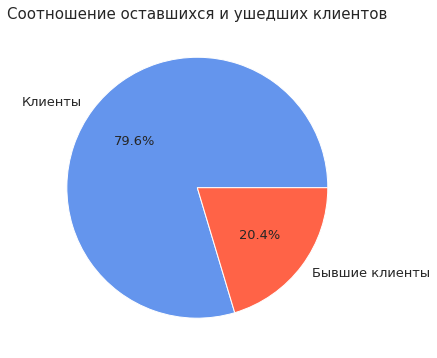

,Клиенты,Бывшие клиенты,%
score,652.0,645.0,-1.07
age,37.0,45.0,21.62
objects,5.0,5.0,0.00
balance,119536.0,120747.0,1.01
products,2.0,1.0,-50.00
credit_card,1.0,1.0,0.00
loyalty,1.0,0.0,-100.00
est_salary,99738.0,101466.0,1.73


In [19]:
# Проанализируем баланс классов 
churn = df_new['churn'].value_counts()
print(churn)

plt.figure(figsize=(6,6))
plt.pie(churn, autopct='%.1f%%', labels=['Клиенты', 'Бывшие клиенты'], colors=['cornflowerblue','tomato'], textprops={'fontsize': 13})
plt.title('Соотношение оставшихся и ушедших клиентов', fontsize=15)
plt.show()

# Выведу на экран статистику по таблице
stat = round(df.drop(['id'], axis=True).groupby('churn').mean()).T
stat['%'] = (((stat[1]-stat[0])/stat[0])*100).round(2)
stat.sort_values(by='%', ascending=False)
stat.columns = ['Клиенты', 'Бывшие клиенты', '%']
stat

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64


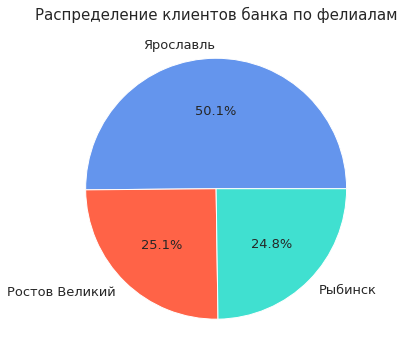

In [20]:
city = df['city'].value_counts()
print(city)
plt.figure(figsize=(6,6))
plt.pie(city, autopct='%.1f%%', colors=['cornflowerblue','tomato', 'turquoise'], labels=city.index, textprops={'fontsize': 13})
plt.title(f'Распределение клиентов банка по фелиалам', fontsize=15)
plt.show()

Что можно отметить:

- 🟢 Скоринговый бал не отличается у оставшихся и ушедших клиентов;
- 🔴 Средний возраст клиентов попадающих в отток старше на 7 лет;
- 🟢 Объектов в собственности одинаковое количество у обеих групп;
- 🟢 Средняя сумма на счете у клиентов так же не отличается (≈ 120 000р);
- 🔴 Клиенты, с одним продуктом склонны попадать в отток;
- 🟢 Наличие кредитной карты не влияет на отток;
- 🔴 Менее активный клиент попадает в отток

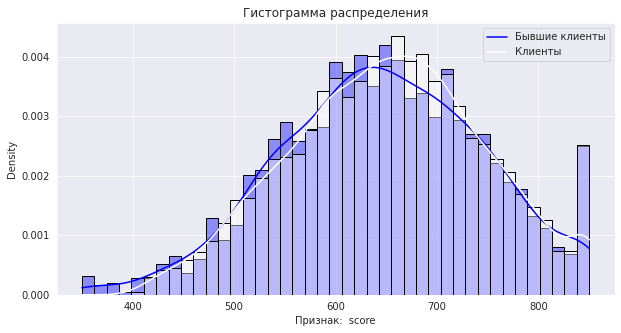

'Признак: score'

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64

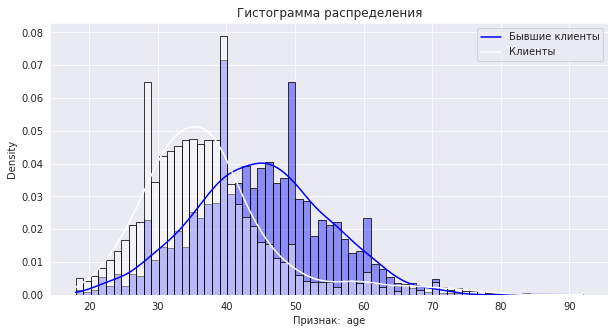

'Признак: age'

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

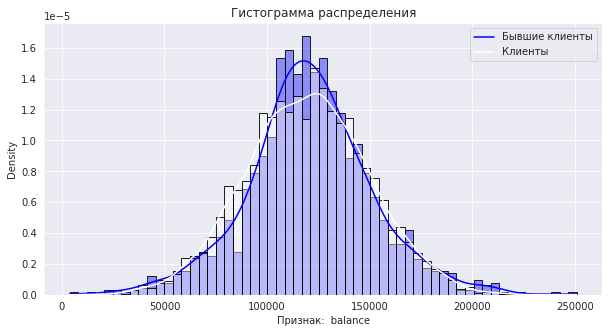

'Признак: balance'

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: balance, dtype: float64

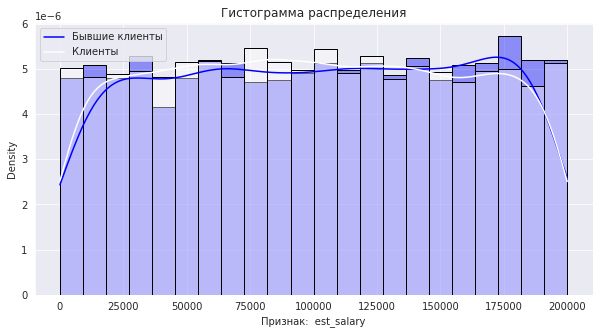

'Признак: est_salary'

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: est_salary, dtype: float64

In [21]:
for column in ['score', 'age', 'balance', 'est_salary']:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=column, hue='churn', edgecolor = 'black',  stat='density', common_norm=False, kde=True, alpha=0.4, palette='flag')
    sns.set_style('darkgrid')
    plt.title(f'Гистограмма распределения')
    plt.xlabel(f'Признак:  {column}')
    plt.legend(labels=['Бывшие клиенты', 'Клиенты'])
    plt.show()
    display(f'Признак: {column}', df[column].describe().T)

- На графике распределения кредитного скоринга виден пик значений на 850 баллах. Предположу, что это максимально допустимый балл на данный момент. Большая часть клиентов имеет высокий кредитный рейтинг;
- Распределение заработной платы на графике отображене равномерно. Отток клиентов одинаковый вне зависимости от неё.

Рассмотрим подробнее сведенья о возрасте клиентов: среднее, минимальное и максимальное значение в разбивке по оттоку и `churn` и `gender`.

mean  min  max
gender churn                
Ж      0      37.0   18   85
       1      45.0   19   84
М      0      37.0   18   92
       1      45.0   18   71

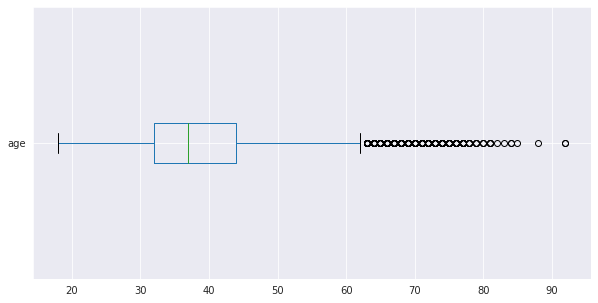

In [22]:
plt.figure(figsize=(10, 5))
df.boxplot(['age'], vert=False)
display(round(df.groupby(['gender', 'churn'])['age'].agg(['mean', 'min', 'max'])))

Средний возраст бывших клиентов банка 45 лет, и у оставшихся - 37 лет. Значение одинаковое у обоих полов. Разделю клиентов по возрастным категориям и рассмотрим подробнее процент оттока. 

In [23]:
# Создаем функцию для категоризации возраста и добавим в новый столбец 
def age_group(age):
    if age<31:
        return '18-30 лет'
    if age<45:
        return '30-45 лет'
    if age<60:
        return '45-60 лет'
    if age>=60:
        return 'от 60 лет'   

df_new['age_group'] = df_new['age'].apply(age_group)

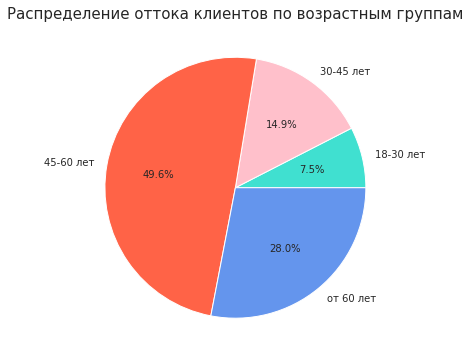

In [24]:
churn_age = df_new.groupby('age_group')['churn'].mean()
plt.figure(figsize=(6,6))
plt.pie(churn_age, labels=churn_age.index, colors=['turquoise', 'pink', 'tomato', 'cornflowerblue'], autopct='%1.1f%%')
plt.title('Распределение оттока клиентов по возрастным группам', fontsize=15)
plt.show()

Используем данные параметры для дальнейшей сегментации. Так же подробнее рассмотрим параметры баланса

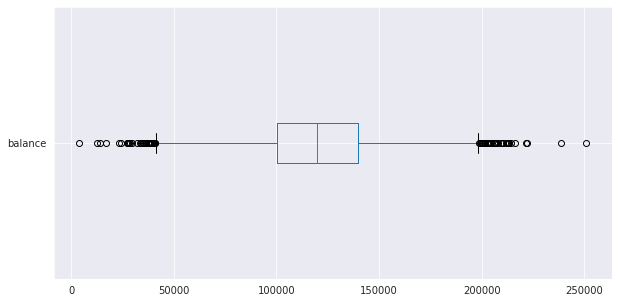

In [25]:
plt.figure(figsize=(10, 5))
df_new.boxplot(['balance'], vert=False)
plt.show()

In [26]:
display(round(df.groupby(['churn'])['balance'].agg(['mean', 'min', 'max'])))
display(round(df.groupby(['churn', 'gender'])['balance'].agg(['mean', 'min', 'max'])))
display(round(df.groupby(['churn', 'city'])['balance'].agg(['mean', 'min', 'max'])))
round(df_new.groupby(['churn', 'age_group'])['balance'].agg(['mean', 'min', 'max']))

,mean,min,max
churn,,,
0,119536.0,14263.0,221533.0
1,120747.0,3769.0,250898.0


mean      min       max
churn gender                             
0     Ж       118778.0  14263.0  212778.0
      М       120087.0  16894.0  221533.0
1     Ж       119450.0   3769.0  238388.0
      М       122348.0  24043.0  250898.0

mean      min       max
churn city                                       
0     Ростов Великий  119427.0  27288.0  214347.0
      Рыбинск         119821.0  14263.0  221533.0
      Ярославль       119485.0  16894.0  212778.0
1     Ростов Великий  120361.0  62389.0  181461.0
      Рыбинск         119792.0  12459.0  250898.0
      Ярославль       121916.0   3769.0  238388.0

mean      min       max
churn age_group                             
0     18-30 лет  119561.0  32198.0  214347.0
      30-45 лет  119701.0  14263.0  221533.0
      45-60 лет  119105.0  40686.0  191809.0
      от 60 лет  118289.0  27288.0  187013.0
1     18-30 лет  126579.0  27756.0  210433.0
      30-45 лет  120933.0   3769.0  250898.0
      45-60 лет  120129.0  12459.0  238388.0
      от 60 лет  117373.0  38340.0  185649.0

Средняя сумма на счету у отточных и текущих клиентов банка не отличается ≈ 120 тыс.

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

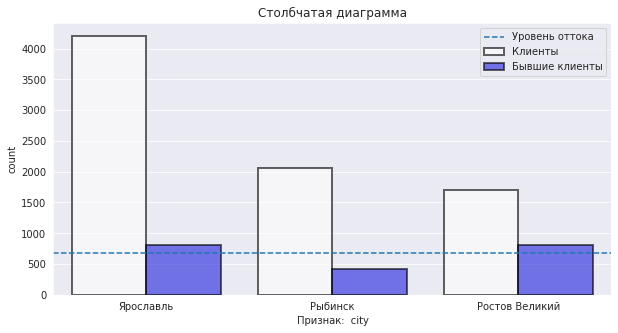

М    5457
Ж    4543
Name: gender, dtype: int64

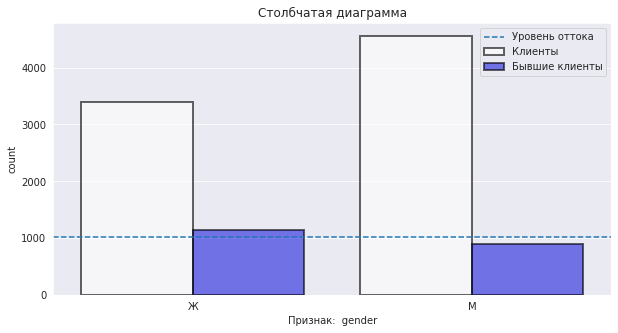

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

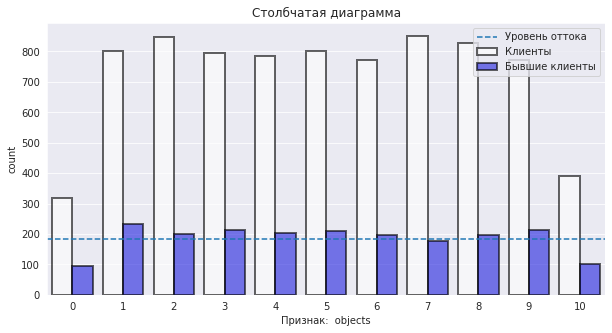

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

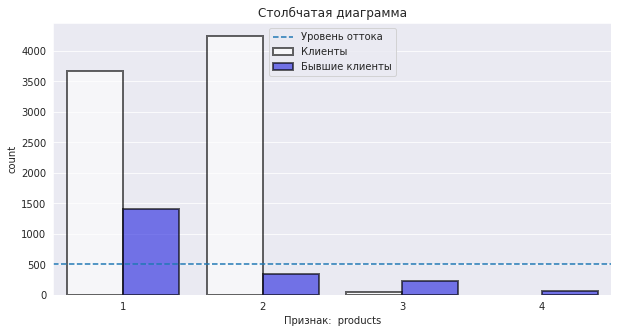

1    7055
0    2945
Name: credit_card, dtype: int64

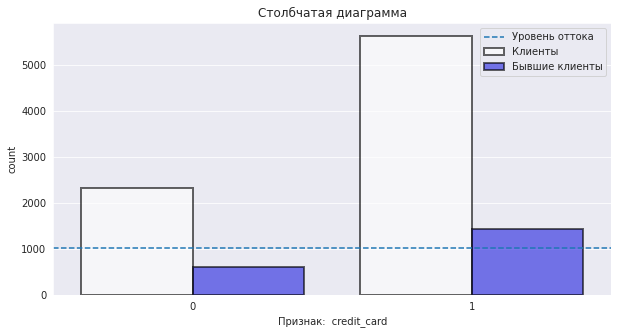

1    5151
0    4849
Name: loyalty, dtype: int64

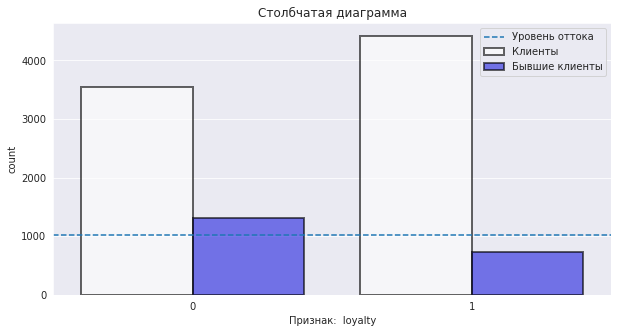

0    7963
1    2037
Name: churn, dtype: int64

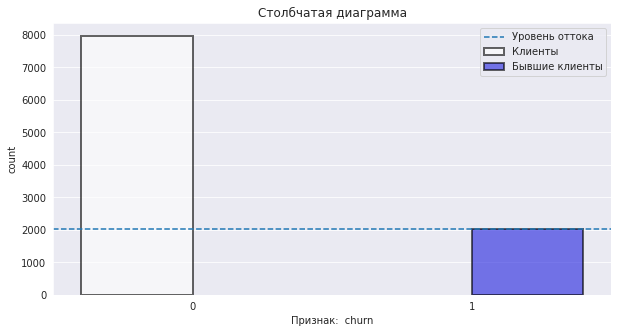

In [27]:
for column in ['city', 'gender', 'objects', 'products', 'credit_card', 'loyalty', 'churn']:
    churn_rate = int((df.query('churn == 1').groupby(column).agg({'churn':'count'})).mean())
    
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=column, hue='churn', alpha=0.6, edgecolor = 'black', linewidth=2, palette='flag', )
    sns.set_style('darkgrid')
    plt.axhline(churn_rate, label='Уровень оттока', linestyle='--')
    plt.title(f'Столбчатая диаграмма')
    plt.xlabel(f'Признак:  {column}')
    plt.legend(labels=['Уровень оттока', 'Клиенты', 'Бывшие клиенты'])
    display(df[column].value_counts().sort_values(ascending=False))
    plt.show()

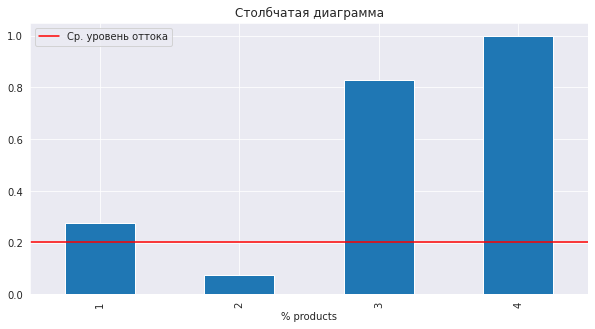

In [28]:
df.groupby('products').agg({'churn':'mean'}).plot.bar(figsize=(10,5)).axhline(df.churn.mean(),c='red')
plt.title('Столбчатая диаграмма')
plt.xlabel('% products')
plt.legend(labels=['Ср. уровень оттока'])
plt.show()

- Большая часть клиентов из Ярославля. Но в отток чаще попадают клиенты из Ростова Великого, если смотреть на общее число клиентов.
- Как говорилось выше соотношение мужчин и женщин примерно одинаковое. Но относительно общего количества клиентов распределенного по полам, мужчины попадают в отток реже;
- В зависимости от количества объектов в собственности ситуация с оттоком не меняется. Единственные выбивающиеся значения это 0 и 10 объектов;
- Клиенты которые имеют 1-2 продукта банка реже попадают в отток, чем клиенты с 3-4 продуктами. При этом самих клиентов с 3-4 продуктами существенно меньше.
- Отток клиентов с или без кредитной карты пропорционален количеству клиентов в данной категории;
- Среди активных клиентов меньше доля оттока, что логично.

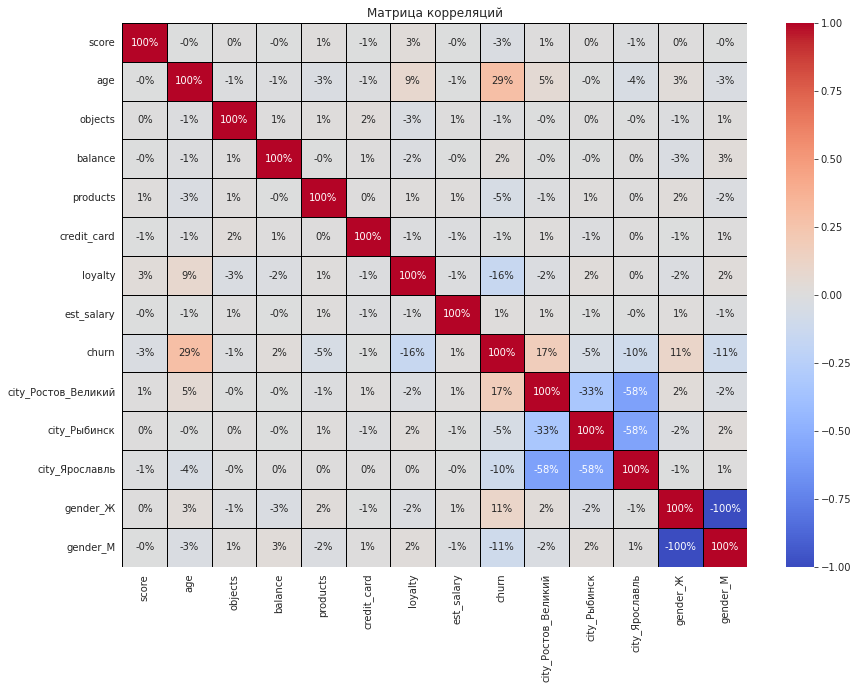

In [29]:
cor = df_new.drop(['id'], axis=1).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cor, annot=True, fmt='.0%', cmap='coolwarm', linecolor='black', linewidths=1)
plt.title(f'Матрица корреляций')
plt.show()

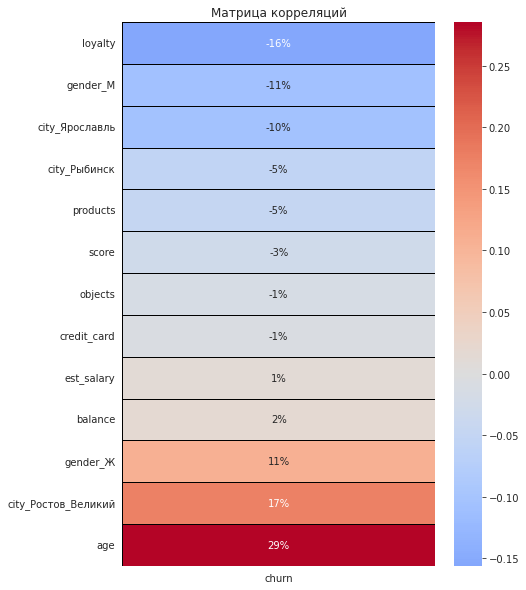

In [30]:
plt.figure(figsize=(7, 10))
sns.heatmap(cor.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt='.0%', cmap='coolwarm',center=0, linecolor='black', linewidths=1)
plt.title(f'Матрица корреляций')
plt.show()

На данной матрице видно, что признаки слабо коррелируют между собой. Наблюдается слабая взаимосвязь оттока клиентов с возрастом и с городом Ростовом Великим.

Сформулируем промежуточный вывод:
Не влияют на отток следующие признаки:
- Баллы кредитного скорринга;
- Баланс на счёте клиента;
- Количество объектов в собственности;
- Наличие кредитной карты.

Основные признаки влияющие на отток: 
- Город;
- Пол;
- Возраст;
- Активность клиента;
- Количество продуктов банка.
___
**Составим предварительные портреты клиентов**:

🟢Клиент менее склонен к оттоку🟢
- Мужчина;
- 45 лет;
- Имеет 2 банковских продукта;
- Активный пользователь банка.

🔴Клиент склонный к оттоку🔴
- Женщина;
- 45-60 лет;
- Имеют 1,3 или 4 продукта банка;
- Не активный пользователь банка.
___

## Построить модель прогнозирования оттока клиентов


Подготовим датасет, разделим данные на обучающую и тестовую выборки.

In [31]:
# Выделим признаки
X = df_new.drop(['id','balance', 'churn', 'age_group'], axis=1)
y = df_new['churn']

In [32]:
# Разделим данные на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [33]:
print('------------------------------')
print(f'Размер обучающей выборки: {X_train.shape[0]/len(df):.0%}')
print(f'Размер тестовой выборки: {X_test.shape[0]/len(df):.0%}')
print('------------------------------')

------------------------------
Размер обучающей выборки: 80%
Размер тестовой выборки: 20%
------------------------------


Обучим следующие модели на train-выборке:
- LogisticRegression; 
- DecisionTreeClassifier;
- RandomForestClassifier.
    
Для противодействия дисбаланса классов целевого признака (1:4), при обучении моделей зададим параметр *class_weight='balanced'* 

Используем метрику AUC-ROC

#### LogisticRegression

In [34]:
%%time 

model_lr = LogisticRegression(random_state=0, penalty='l2', class_weight='balanced')

param_lr = {'C': range(1, 5)}

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.1 µs


In [35]:
%%time 

model_lr = GridSearchCV(model_lr, 
                        param_grid=param_lr,
                        scoring='roc_auc')

model_lr.fit(X_train, y_train)

print('---Логистическая регрессия---')
print('Лучшие параметры:', model_lr.best_params_)
print('AUC-ROC:', round(model_lr.best_score_, 4))
print('--------------------------------------------------')

---Логистическая регрессия---
Лучшие параметры: {'C': 1}
AUC-ROC: 0.7181
--------------------------------------------------
CPU times: user 2.5 s, sys: 4.72 s, total: 7.22 s
Wall time: 506 ms


#### DecisionTreeClassifier

In [36]:
%%time 

model_dtc = DecisionTreeClassifier(random_state=0, class_weight='balanced')

param_dtc = {'max_depth': range (1, 10)}

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 24.1 µs


In [37]:
%%time 

model_dtc = GridSearchCV(model_dtc,
                         param_grid=param_dtc,
                         scoring='roc_auc')

model_dtc.fit(X_train, y_train)

print('---Дерево решений---')
print('Лучшие параметры:', model_dtc.best_params_)
print('AUC-ROC:', round(model_dtc.best_score_, 4))
print('--------------------------------------------------')

---Дерево решений---
Лучшие параметры: {'max_depth': 5}
AUC-ROC: 0.8281
--------------------------------------------------
CPU times: user 688 ms, sys: 578 ms, total: 1.27 s
Wall time: 616 ms


#### RandomForestClassifier

In [38]:
%%time 

model_rfc = RandomForestClassifier(random_state=0, class_weight='balanced')

param_rfc = {'max_depth': range (1, 10), 'n_estimators': range(70, 100)}

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 33.9 µs


In [39]:
%%time 

model_rfc = GridSearchCV(model_rfc,
                         param_grid=param_rfc,
                         scoring='roc_auc')

model_rfc.fit(X_train, y_train)

print('---Случайный лес---')
print('Лучшие параметры:', model_rfc.best_params_)
print('AUC-ROC:', round(model_rfc.best_score_, 4))
print('--------------------------------------------------')

---Случайный лес---
Лучшие параметры: {'max_depth': 7, 'n_estimators': 93}
AUC-ROC: 0.847
--------------------------------------------------
CPU times: user 4min 28s, sys: 1.64 s, total: 4min 29s
Wall time: 5min 1s


In [40]:
best_model = RandomForestClassifier(random_state=0, class_weight='balanced',  max_depth=5, n_estimators=82)
best_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=82,
                       random_state=0)

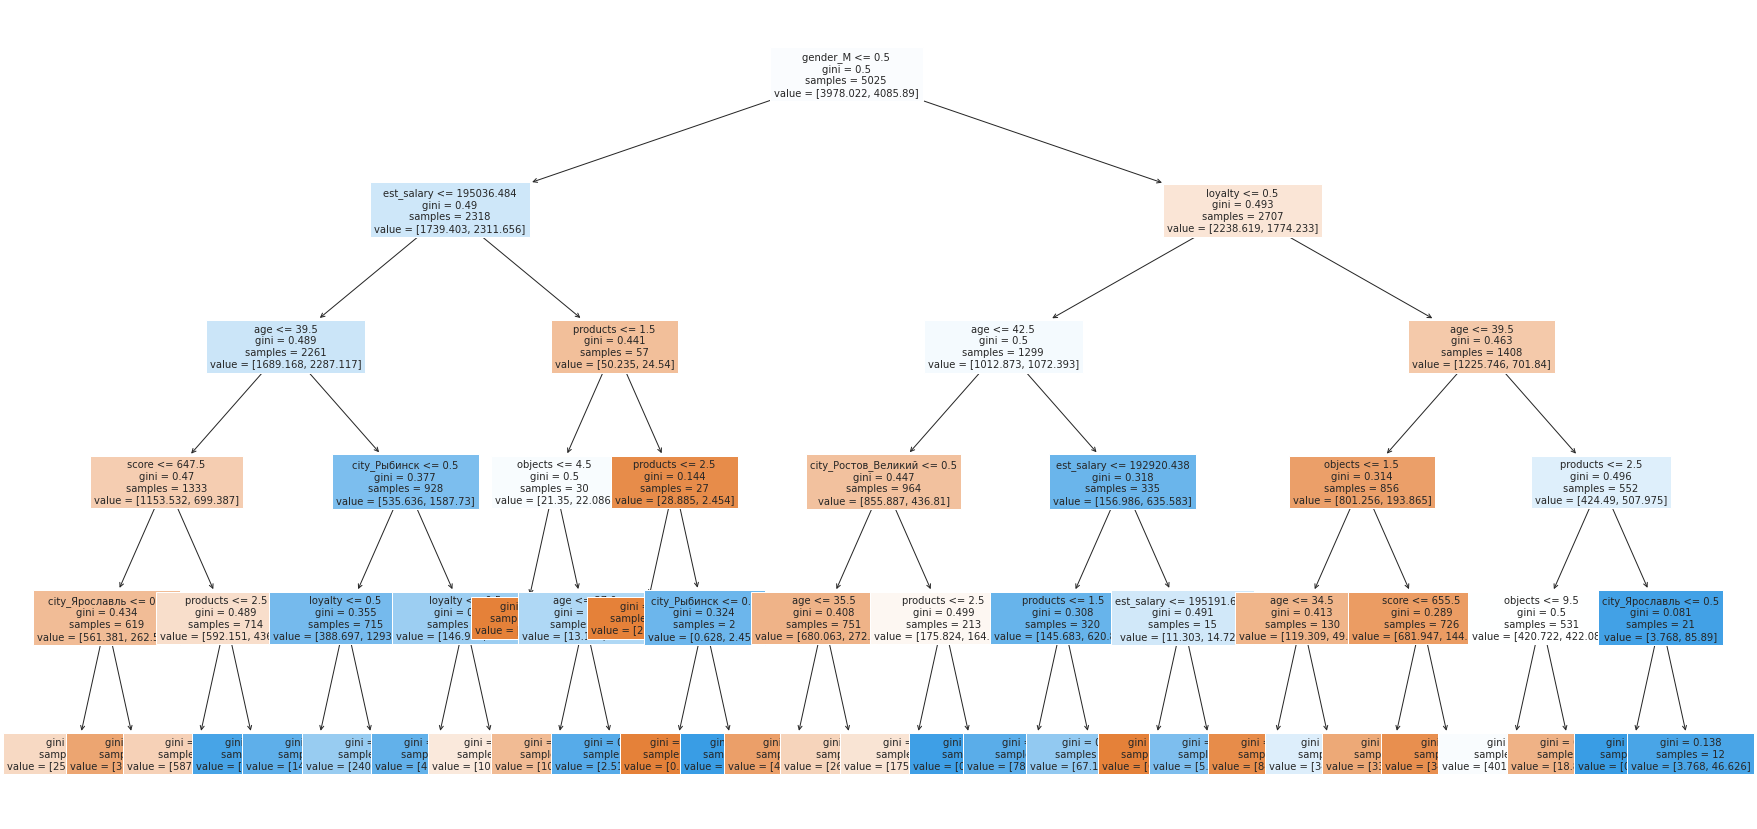

In [41]:
plt.figure(figsize = (30,15))
tree.plot_tree(best_model.estimators_[0], feature_names=X_train.columns, filled=True, fontsize = 10)
plt.show() 

На лучшей модели используем **.feature_importances_** рассмотрим важные признаки влиющие на отток.

In [42]:
importances = best_model.feature_importances_

feature_results = pd.DataFrame({'columns': list(X_train.columns),'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

feature_results.sort_values('importance', ascending = False)

,columns,importance
0,age,0.479526
1,products,0.262044
2,loyalty,0.075501
3,city_Ростов_Великий,0.068785
4,gender_М,0.024379
5,gender_Ж,0.019509
6,score,0.017612
7,city_Ярославль,0.017527
8,est_salary,0.016952
9,city_Рыбинск,0.008659


Наиболее важные признаки влияющие на отток:
- Возраст;
- Продукты;
- Клиент Ростовского банка;
- Клиенты женского пола;
- Активность клиента.

In [43]:
columns = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']

result_auc_roc = [
    {'AUC-ROC':'0.718', 'parameter': 'C=1'},
    {'AUC-ROC':'0.828', 'parameter': 'max_depth=5'},
    {'AUC-ROC':'0.847', 'parameter': 'max_depth=8 , n_estimators=82'},

]
print('Итоговый результат:')
table = pd.DataFrame(result_auc_roc, index=columns)
table

Итоговый результат:


,AUC-ROC,parameter
LogisticRegression,0.718,C=1
DecisionTreeClassifier,0.828,max_depth=5
RandomForestClassifier,0.847,"max_depth=8 , n_estimators=82"


Лучшая модель прогнозирования оттока клиентов `RandomForestClassifier`, с самой высоким процентом правильных ответов в 84.5%

## Проверка гипотез
### 1. Средний доход клиентов, и тех, кто попал в отток равен.

Сформулируем нулевую(H₀) и альтернативную гипотезы(На):

- H₀ - Средний доход клиентов и попавших в отток равен;

- На - Средний доход клиентов и попавших в отток различается.

In [44]:
salary_0 = df.query('churn == 0').reset_index()['est_salary']
salary_1 = df.query('churn == 1').reset_index()['est_salary']

In [45]:
print('Выборочное среднее дохода клиентов:', round(salary_0.mean(), 0))
print('Выборочное среднее дохода ушедших клиентов:', round(salary_1.mean(), 0))
print('----------------------------------------------------')
print('Дисперсия выборки по клиентам:', round(np.var(salary_0, ddof = 1), 0))
print('Дисперсия выборки по ушедшим клиентам:', round(np.var(salary_1, ddof = 1), 0))

Выборочное среднее дохода клиентов: 99738.0
Выборочное среднее дохода ушедших клиентов: 101466.0
----------------------------------------------------
Дисперсия выборки по клиентам: 3295401415.0
Дисперсия выборки по ушедшим клиентам: 3353848167.0


Для проверки гипотезы применим t-тест (st.ttest_ind()) т.к.:
- Генеральные совокупности не зависят друг от друга;
- Выборочные средние должны быть нормально распределены;
- в значении `equal_var` укежим `True`, т.к. дисперсии выборок почти равны.

In [46]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    salary_0,
    salary_1,
    equal_var = True)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.22644042802223346
Не получилось отвергнуть нулевую гипотезу


По результатам проверки нет оснований отвергнуть нулевую гипотезу.

Средний доход клиентов и тех, кто попал в отток равен. С вероятностью 22% Доход будет отличаться.

### 2. Количества объектов в собственности клиентов и тех, кто попал в отток различается.  

In [47]:
objects_0 = df.query('churn == 0')['objects']
objects_1 = df.query('churn == 1')['objects']

Сформулируем нулевую(H₀) и альтернативную гипотезы(На):

- H₀ - Количество объектов в собственности клиентов и тех, кто попал в отток равно;

- На - Количество объектов в собственности клиентов и тех, кто попал в отток отличается;

Для проверки гипотезы буду использовать U-тест Манна-Уитни (mannwhitneyu):
- Анализируемая переменная непрерывная;

- Наблюдения обеих групп независимы друг от друга.

In [48]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(objects_0, objects_1)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.16219376122918827
Не получилось отвергнуть нулевую гипотезу


По результ
атам проверки нет оснований отвергнуть нулевую гипотезу, количество объектов в собственности клиентов и тех, кто попал в отток не отличается.

## Сегментация пользователей

После проведённого исследования можно выделить основные факторы влияющие на отток клиентов: город, пол, возраст, активность клиента, количество продуктов банка.

Подберём сегменты с высокой долей оттока по вышеперечисленным признакам.

In [49]:
# Отсортируем отточных клиентов  
churn_1 = df_new.query('churn == 1')

- **Сегмент 1** - женщина в возрасте от 45 до 60 лет

In [50]:
segment_1 = df_new.query('gender_Ж==1 and age_group=="45-60 лет"')
print('Клиентов в сегменте - ', len(segment_1))
print(f'Уровень оттока - {round(segment_1["churn"].mean()*100,1)} %')

Клиентов в сегменте -  908
Уровень оттока - 55.6 %


- **Сегмент 2** - неактивные клиенты, в пользовании 1,3 или 4 продукта банка

In [51]:
segment_2 = df_new.query('loyalty==0 and products!=2')

print('Клиентов в сегменте - ', len(segment_2))
print(f'Уровень оттока - {round(segment_2["churn"].mean()*100,1)} %')

Клиентов в сегменте -  2705
Уровень оттока - 40.3 %


- **Сегмент 3** - неактивные клиенты, в пользовании 1,3,4 продукта банка. Обслуживался в Ростовском отделении.

In [52]:
segment_3 = df_new.query('city_Ростов_Великий==1 and products!=2 and loyalty==0')

print('Клиентов в сегменте - ', len(segment_3))
print(f'Уровень оттока - {round(segment_3["churn"].mean()*100,1)} %')

Клиентов в сегменте -  789
Уровень оттока - 55.8 %


## Общий вывод

1. В исследовании использовались данные о клиентах банка «Метанпром». Изучили общую информацию и подготовили датасет к анализу, сделав следующее: 

    - Привели названия столбцов к единому стилю;
    - Преобразовали категориальные значения в столбцах gender и city в числовые;
    - Заменили тип данных;
    - Проверили данные на наличие явных дубликатов и пропусков.
 
2. Провели исследовательский анализ данных 

    - Рассмотрели общую статистику по датасету;
    - Изучили количественные и категориальные признаки с распределением по столбцу `churn`;
    - Построили матрицу корреляций и изучили взаимосвязи признаков;
    - Выявили признаки которые влияют на отток клиентов:
        - Город;
        - Пол;
        - Возраст;
        - Активность клиента;
        - Количество продуктов банка.
    - Также выявлены признаки, которые в меньшей степени на отток:
        - Баллы кредитного скоринга;
        - Баланс на счёте клиента;
        - Количество объектов в собственности;
        - Наличие кредитной карты.
    
4. Построить модель прогнозирования оттока клиентов
    - Разделить данные на обучающую и тестовую выборки;
    - Обучение моделей;
    - Использовали plot_tree, чтобы отобразить получившееся дерево.

In [53]:
columns_1 = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']

result_auc_roc = [
    {'AUC-ROC':'0.718', 'parameter': 'C=1'},
    {'AUC-ROC':'0.828', 'parameter': 'max_depth=5'},
    {'AUC-ROC':'0.847', 'parameter': 'max_depth=8 , n_estimators=82'},

]
print('Итоговый результат:')
table_1 = pd.DataFrame(result_auc_roc, index=columns_1)
table_1

Итоговый результат:


,AUC-ROC,parameter
LogisticRegression,0.718,C=1
DecisionTreeClassifier,0.828,max_depth=5
RandomForestClassifier,0.847,"max_depth=8 , n_estimators=82"


Лучшая модель прогнозирования  оттока клиентов `RandomForestClassifier`, с самой высоким процентом правильных  ответов в 84.5%
На ней же использовали **.feature_importances_** выявили наиболее важные признаки влияющие на отток:
- Возраст;
- Продукты;
- Клиент Ростовского банка;
- Клиенты женского пола;
- Активность клиента.

5. Проверка гипотез
    - Подтвердили гипотезу: средний доход клиентов и тех, кто попал в отток равен;
    - Подтвердили гипотезу: количество объектов в собственности клиентов и тех, кто попал в отток не отличается.
    
6. Сегментация пользователей
    - Выделили 3 отточных сегмента:

In [54]:
columns_2 = ['Сегмент 1', 'Сегмент 2', 'Сегмент 3']

segment = [
    {'Кол-во клиентов':'908', '% оттока': '55.6'},
    {'Кол-во клиентов':'2705', '% оттока': '40.3'},
    {'Кол-во клиентов':'789', '% оттока': '55.8'}
]
table_2 = pd.DataFrame(segment, index=columns_2)
table_2

,Кол-во клиентов,% оттока
Сегмент 1,908,55.6
Сегмент 2,2705,40.3
Сегмент 3,789,55.8



🟢Клиент менее склонен к оттоку🟢
- Мужчина;
- Младше 45 лет;
- Имеет 2 банковских продукта;
- Активный пользователь банка.

🔴Клиент склонный к оттоку🔴
- Женщина;
- Старше 45-60 лет;
- Имеет 1,3 или 4 банковских продукта;
- Не активный пользователь банка.
___

## Рекомендации 

Сформулируем рекомендации по сегментам для удержания пользователей:

1. Больше всего подвержены оттоку женщины 45-60 лет. Это может быть вызвано отсутствием интересных предложений при пользовании продуктами банка. Например, при маленьком количестве предложений по кэшбеку или невыгодной процентной ставки по вкладу, для клиента может быть нецелесообразна цена за обслуживание продуктов банка. Возможно находят более выгодные предложения в другом банке.

2. В следующий отточный сегмент - неактивный клиент, в пользовании 1,3 или 4 продукта банка. Оценить удобство пользования более, чем тремя продуктами банка в приложении. Так же уделить внимание работе технической поддержки при консультировании подобных клиентов. Т.к. данная группа клиентов еще и менее активная, возможно стоит проработать пуш-уведомления, сообщения напоминающие клиенту о приложении, с новостями, специальными предложениями или бонусами.

3. В данном сегменте малоактивные клиенты при этом пользователи 1,3,4 продуктами банка, обслуживались в Ростовском отделении. Необходимо исследовать работу данных филиалов, на качество предоставляемых услуг. Можно уделить дополнительное внимание работе сотрудников банка по дополнительному информированию клиента по имеющимся у него продуктам и помощи при работе с приложением, поскольку в отток попадают клиенты сильно старше 35 лет.


Помимо привлечения новых клиентов, стоит больше обеспокоиться удержанием старых клиентов, 20% оттока - достаточно высокий показатель. Можно провести акцию по удержанию клиентов наподобие «приведи друга» с поощрениями.
Для всех вышеупомянутых категорий необходимо пересмотреть программу лояльности, добавить больше выгодных предложений наподобие: повышенного кэшбека, ипотеки с пониженной ставкой зарплатным клиентам банка или поработать над более выгодными условиями обслуживания.